<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

Año,Cantidad
1988.0,1
1989.0,1
1990.0,5
1991.0,5
1993.0,2
1994.0,3
1996.0,1
1997.0,1
1998.0,2
1999.0,2


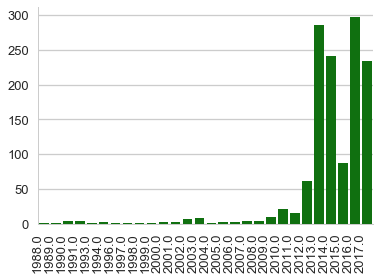

In [20]:
years, counts = numpy.unique(dataset.year.dropna(axis=0, how='any').values.astype(str),
                             return_counts=True)
years_cantidad = [x for x in zip(years, counts)]
display(HTML(
    '<table><thead><tr><th>Año</th><th>Cantidad</th></tr></thead><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in years_cantidad)
        )
 ))
ax = seaborn.barplot(x=years, y=counts, color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
seaborn.despine()

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

In [21]:
years_fdps = [x/float(counts.sum()) for x in counts]
years_array = [x for x in zip(years, years_fdps)]
display(HTML(
    '<div>Frecuencia de probabilidades por año que ocurrió el evento</div><table><thead><tr><th>Año</th><th>Porcentaje</th></tr></thead><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in years_array)
        )
 ))

Año,Porcentaje
1988.0,0.0007598784194528875
1989.0,0.0007598784194528875
1990.0,0.003799392097264438
1991.0,0.003799392097264438
1993.0,0.001519756838905775
1994.0,0.0022796352583586625
1996.0,0.0007598784194528875
1997.0,0.0007598784194528875
1998.0,0.001519756838905775
1999.0,0.001519756838905775


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

    Rta: No son gráficos iguales, el gráfico de barra nos da una mejor y más rápida comprensión de la situación.

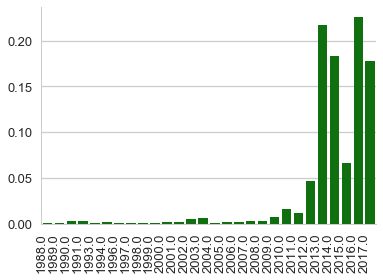

In [22]:
ax = seaborn.barplot(x=years, y=years_fdps, color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
seaborn.despine()

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

RTA: La forma de la distribución se debe a que en los últimos años ha aumentado el valor registrado de la violencia institucional.

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

RTA: Antes del ultimo gobierno hay una probabilidad acumulada de 0.59.

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

RTA: Se quitan de la muestra.

In [44]:
antes_ultimo_gob = years_fdps[:26]
antes_ultimo_gob_accu = numpy.sum(antes_ultimo_gob)
antes_ultimo_gob_accu

0.5965045592705167

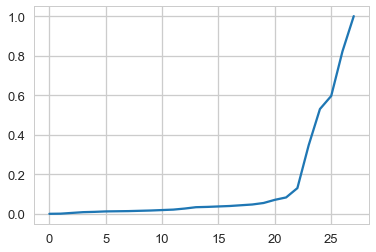

In [45]:
years_accu = numpy.add.accumulate(years_fdps)
plt.plot(years_accu)
plt.show()

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

In [24]:
provincias, counts = numpy.unique(dataset.provincia.dropna(axis=0, how='any').values.astype(str),
                             return_counts=True)

provincias_fdps = [x/float(counts.sum()) for x in counts]
provincias_array = [x for x in zip(provincias, provincias_fdps)]
display(HTML(
    '<table><thead><tr><th>Provincia</th><th>Procentaje de hechos</th></tr></thead><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in provincias_array)
        )
 ))

Provincia,Procentaje de hechos
Buenos Aires,0.6931818181818182
Catamarca,0.0014204545454545455
Chaco,0.020596590909090908
Chubut,0.026278409090909092
Ciudad de Buenos Aires,0.08309659090909091
Corrientes,0.0035511363636363635
Córdoba,0.036931818181818184
Entre Rios,0.006392045454545455
Formosa,0.007102272727272727
Jujuy,0.006392045454545455




* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

Rta: Para mostrar los datos de manera adecuada se necesitaría ver los hechos por año, y tal vez para un mejor análisis, investigar los partidos políticos que estuvieron gobernando en cada provincia en los respectivos años, tal vez particionar los datos por rangos de 4 años, para hacer mas simple el análisis.

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

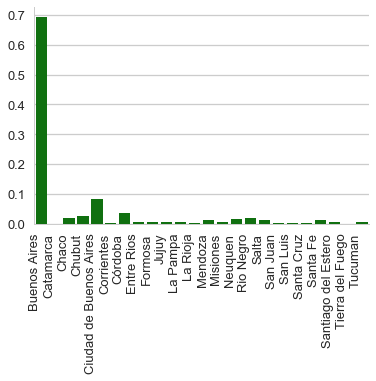

In [25]:
ax = seaborn.barplot(x=provincias, y=provincias_fdps, color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
seaborn.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

In [28]:
entrada_doble = dataset.groupby(['year','provincia']).size().reset_index(name='eventos')
entrada_doble['fdp'] = entrada_doble.eventos / entrada_doble.size
entrada_doble[:10]

,year,provincia,eventos,fdp
0,1988.0,Ciudad de Buenos Aires,1,0.002364
1,1989.0,Buenos Aires,1,0.002364
2,1990.0,Chaco,4,0.009456
3,1990.0,Mendoza,1,0.002364
4,1991.0,Buenos Aires,3,0.007092
5,1991.0,Ciudad de Buenos Aires,2,0.004728
6,1993.0,San Luis,2,0.004728
7,1994.0,Buenos Aires,1,0.002364
8,1994.0,Neuquen,1,0.002364
9,1994.0,Santa Fe,1,0.002364



* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [29]:
%%R
#install.packages('ggplot2')
#install.packages('reshape2')
require('ggplot2')

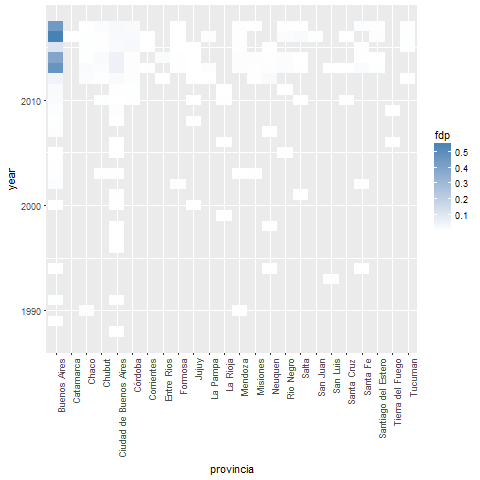

In [30]:
%%R -i entrada_doble
ggplot(data = entrada_doble, aes(x=provincia, y=year, fill=fdp)) + 
  geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?